## **Data Dictionary**

**Task to perform**

Predict the target variable Rain_Tomorrow the column which are the input are as follows:

* DATE: the date if each day is provided to check the data is consistent, we can break date in day, month and year.

* LOCATION: Albury, New castle, Richmode and other areas of Australia is covered.

* MIN TEMP: Min temperatura of each location is provided which helps to check the humidity of the environment.

* MAX TEMP: Max temperature is given to check the probablity of rain.

* RANFALL: Rainfall record is also given, there are som areas where 0.0 value is given so there were no rain happen about 10 years in that region.

* EVAPORATION: Mostly the value of evaporation is NAN in different areas.

* SUNSHNE: Sunshine value is mostly null in areas which the cloudy environment.

* WIND GUST DIR: The direction od wind blowing is provided there.

* WIND GUST SPEED: The speed of wind is also provided there.

* WindDir9am : The direction of wind at specific time is there so the comparison b/w different times will help in analysis of Rain_Tomorrow.

* WindDir3pm : Speed direction at 3pm.

* WindSpeed9am : Within Australia, wind speeds are generally presented in kilometres per hour. Thats why different time stamp wind speed is given there.

* WindSpeed3pm : As above, due to change of wind speed per hour, this will help to predict the target variable.

* Humidity9am : The humidity ranges b/w 6 hours in Australia.

* Humidity3pm : As above, 6 hours change is provided for analysis.

* Pressure9am : Pressure rate per 6 hours is given.

* Pressure3pm : As it ranges or varies from 6 hours, the data will help to find accurate results.

* Cloud9am : The weather changes about 6 hours.

* Cloud3pm : 6 hours gap in cloudy env data will helpful in prediction.

* Temp9am : Temperature varien from north to south.

* Temp3pm : Temperature also varies fom 6 hours time stamp.

* RainToday : Rain Today is helpful to predict either its going to rai tomorrow.

* RainTomorrow : Rain Tomorrow is our target variable to predict the rain in Australia by using above given features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/weatherAUS.csv", encoding_errors = 'ignore')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
data.shape

(145460, 23)

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
days = pd.to_datetime(data['Date']).dt.day
month = pd.to_datetime(data['Date']).dt.month
year = pd.to_datetime(data['Date']).dt.year
day_name = pd.to_datetime(data["Date"]).dt.day_name()

In [8]:
day_name

0            Monday
1           Tuesday
2         Wednesday
3          Thursday
4            Friday
            ...    
145455    Wednesday
145456     Thursday
145457       Friday
145458     Saturday
145459       Sunday
Name: Date, Length: 145460, dtype: object

In [9]:
def preprocessing(data):
  catergorical_cols, numerical_cols = [], []
  for col in data.columns:
    if data[col].dtypes == 'object':
      catergorical_cols.append(col)
      data[col].fillna(data[col].mode()[0], inplace=True)
      days = pd.to_datetime(data['Date']).dt.day
      month = pd.to_datetime(data['Date']).dt.month
      year = pd.to_datetime(data['Date']).dt.year
      data['Day'] = days
      data['Month'] = month
      data['Year'] = year
      data["day_name"] = day_name

    else:
      numerical_cols.append(col)
      data[col].fillna(data[col].mean(), inplace=True)
  return catergorical_cols, numerical_cols, data

In [10]:
categorical_cols,numerical_cols,data_preprocessed = preprocessing(data)

In [11]:
categorical_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
data_preprocessed

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,day_name
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,8.000000,4.50993,16.9,21.8,No,No,1,12,2008,Monday
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,4.447461,4.50993,17.2,24.3,No,No,2,12,2008,Tuesday
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,4.447461,2.00000,21.0,23.2,No,No,3,12,2008,Wednesday
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,4.447461,4.50993,18.1,26.5,No,No,4,12,2008,Thursday
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,7.000000,8.00000,17.8,29.7,No,No,5,12,2008,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,4.447461,4.50993,10.1,22.4,No,No,21,6,2017,Wednesday
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,4.447461,4.50993,10.9,24.5,No,No,22,6,2017,Thursday
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,4.447461,4.50993,12.5,26.1,No,No,23,6,2017,Friday
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,3.000000,2.00000,15.1,26.0,No,No,24,6,2017,Saturday


In [14]:
data_preprocessed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
day_name         0
dtype: int64

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


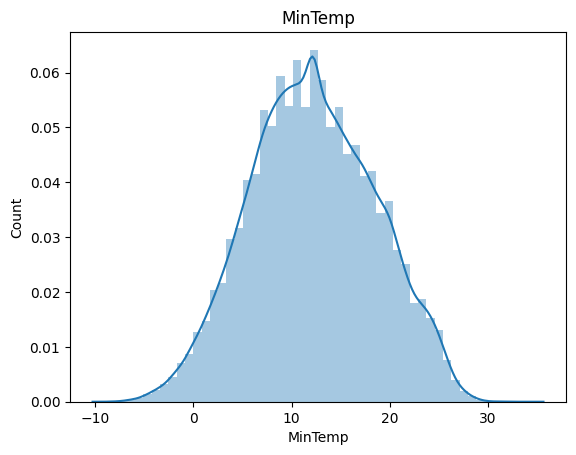

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


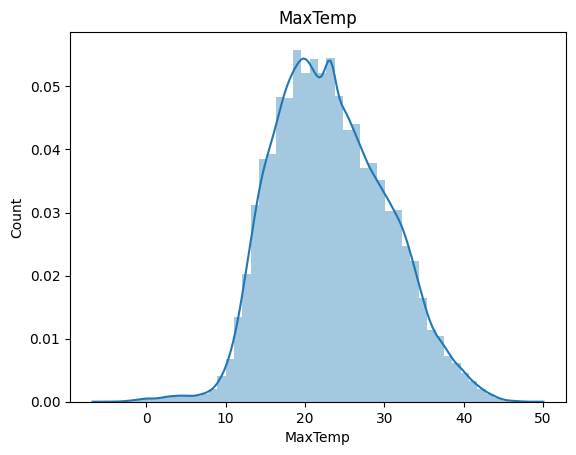

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


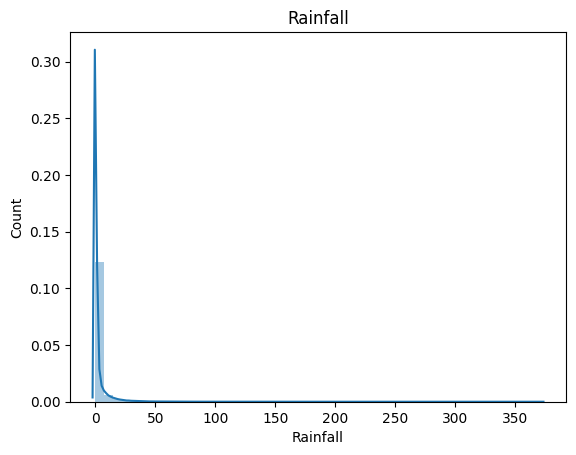

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


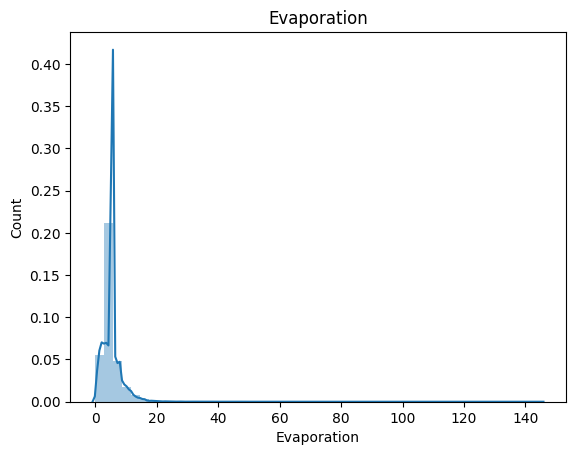

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


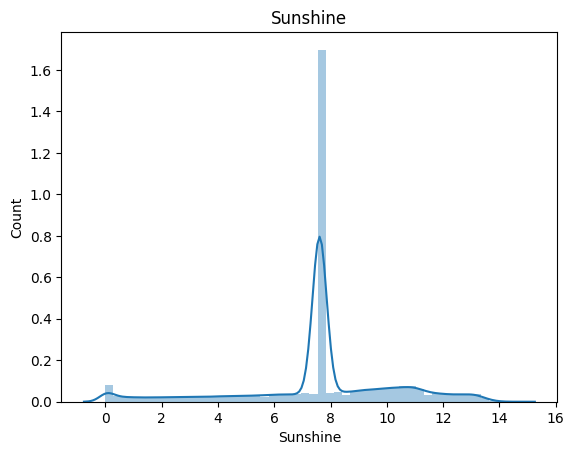

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


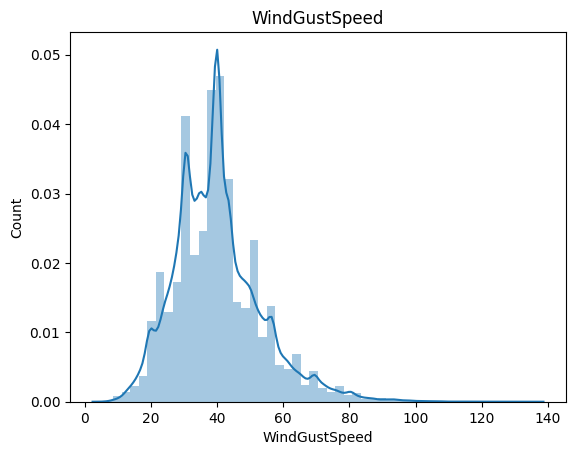

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


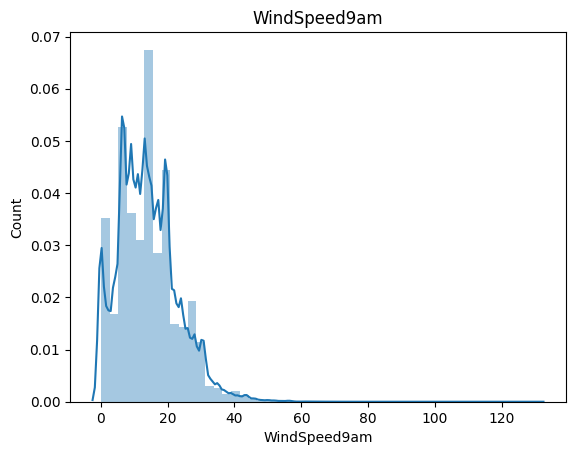

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


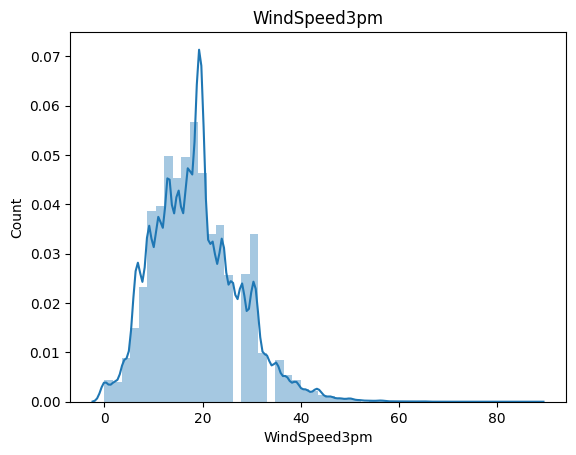

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


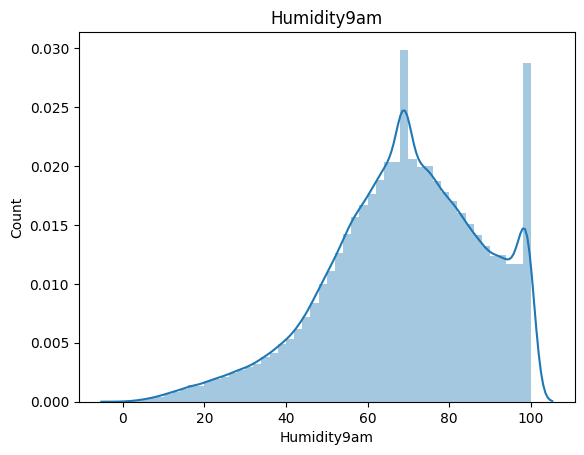

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


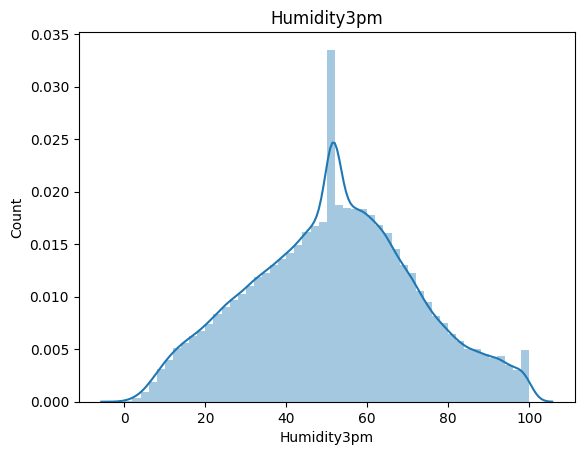

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


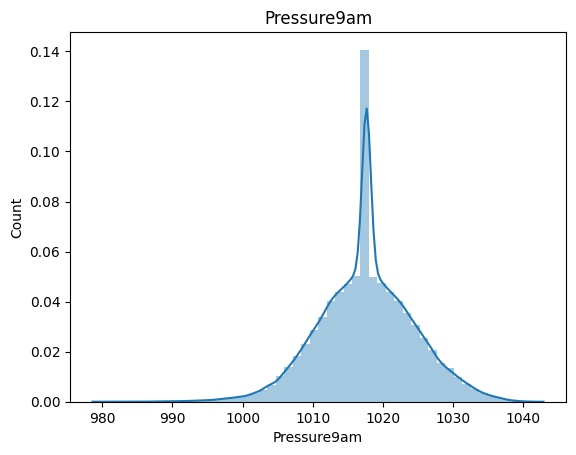

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


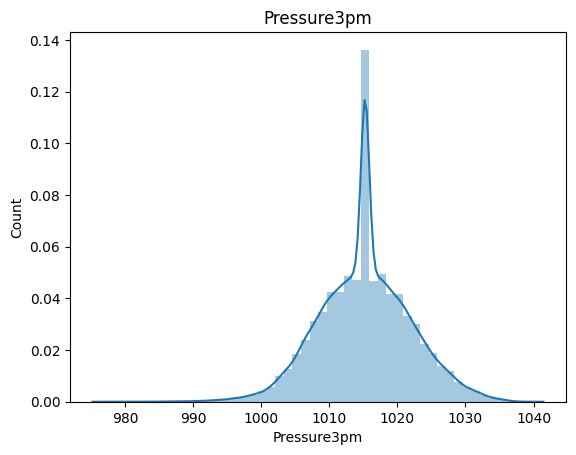

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


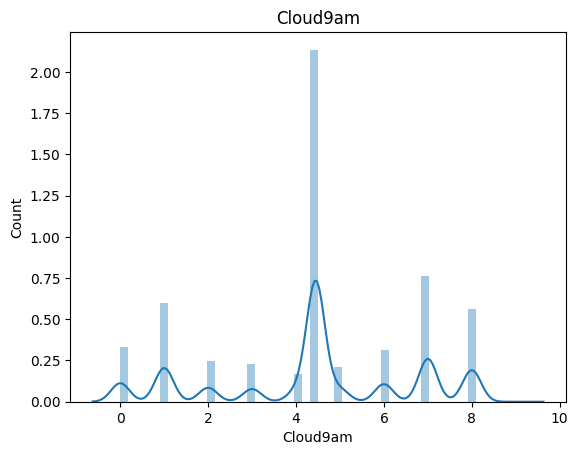

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


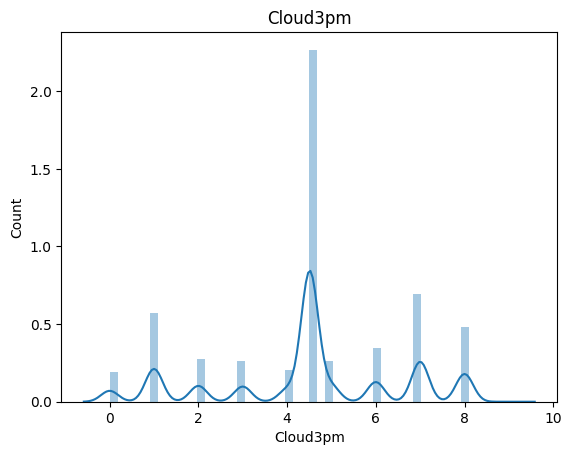

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


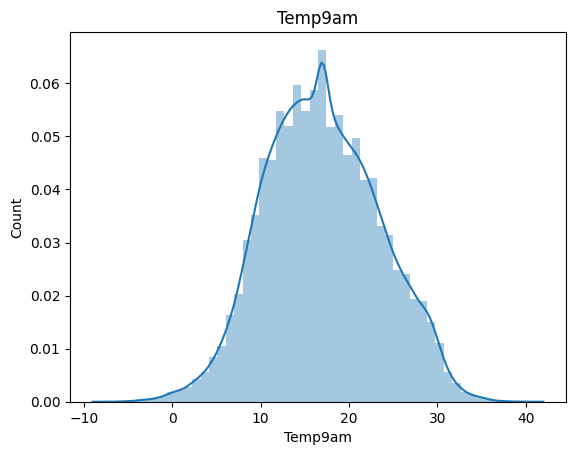

<Figure size 1500x1500 with 0 Axes>

<ipython-input-15-cf91fc9f5b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_preprocessed[feature])


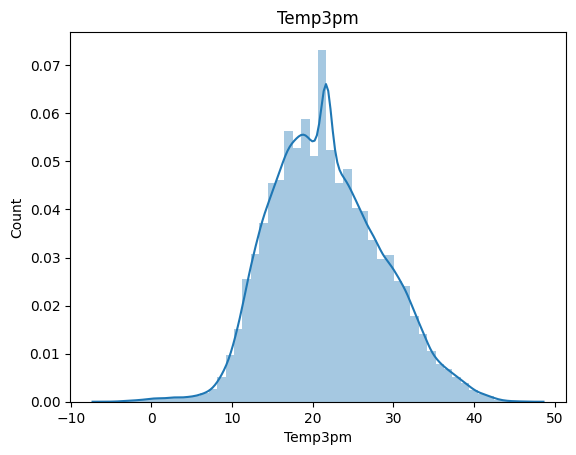

<Figure size 1500x1500 with 0 Axes>

In [15]:
for feature in numerical_cols:
    sns.distplot(data_preprocessed[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

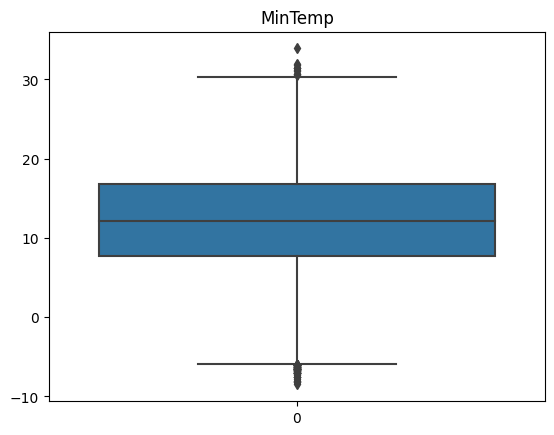

<Figure size 1500x1500 with 0 Axes>

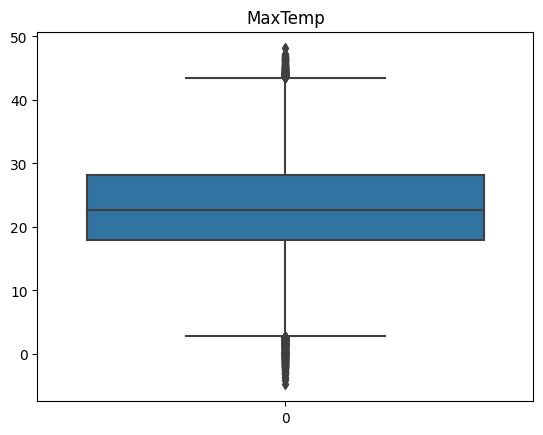

<Figure size 1500x1500 with 0 Axes>

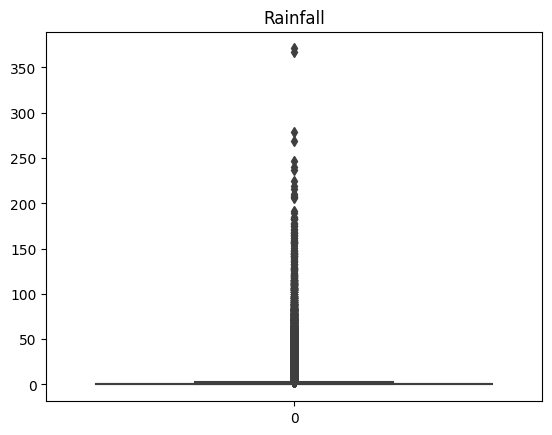

<Figure size 1500x1500 with 0 Axes>

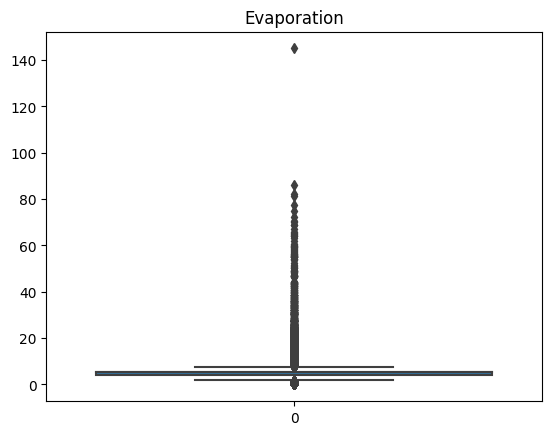

<Figure size 1500x1500 with 0 Axes>

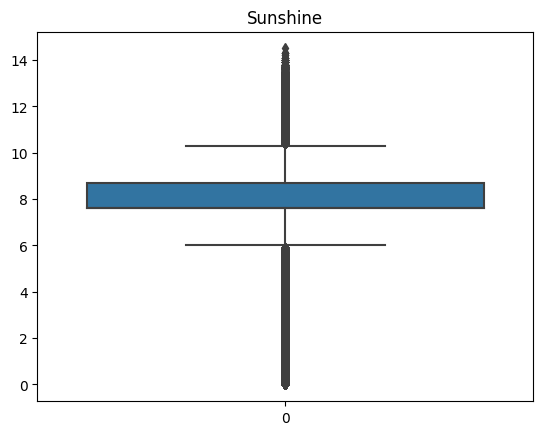

<Figure size 1500x1500 with 0 Axes>

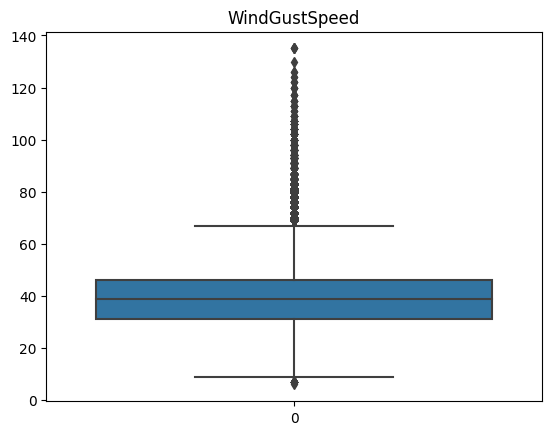

<Figure size 1500x1500 with 0 Axes>

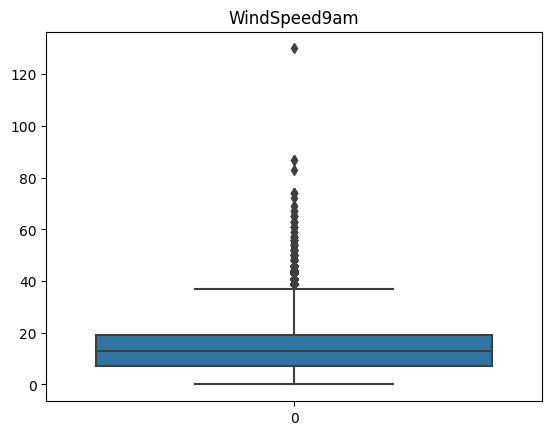

<Figure size 1500x1500 with 0 Axes>

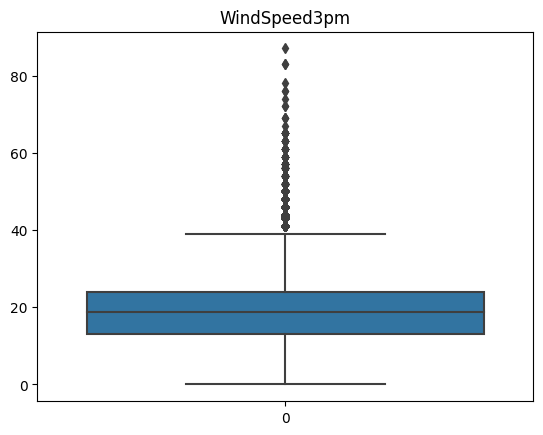

<Figure size 1500x1500 with 0 Axes>

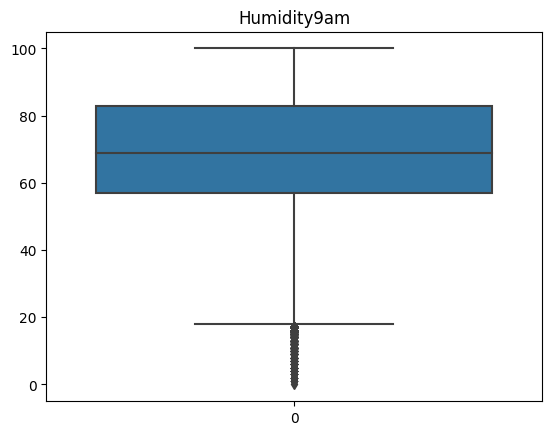

<Figure size 1500x1500 with 0 Axes>

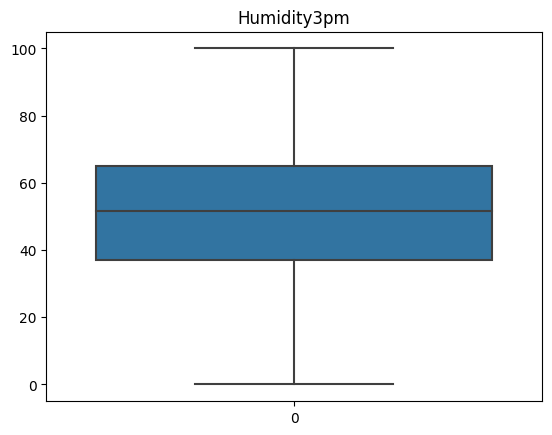

<Figure size 1500x1500 with 0 Axes>

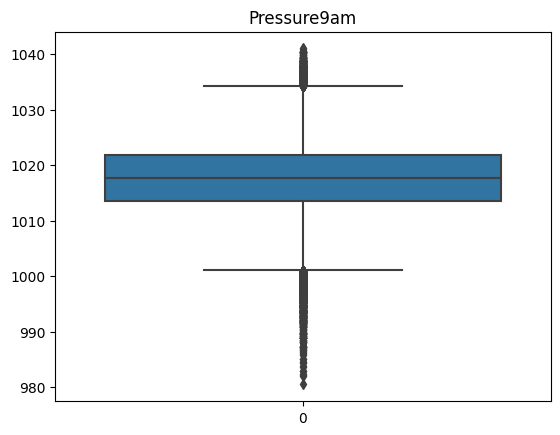

<Figure size 1500x1500 with 0 Axes>

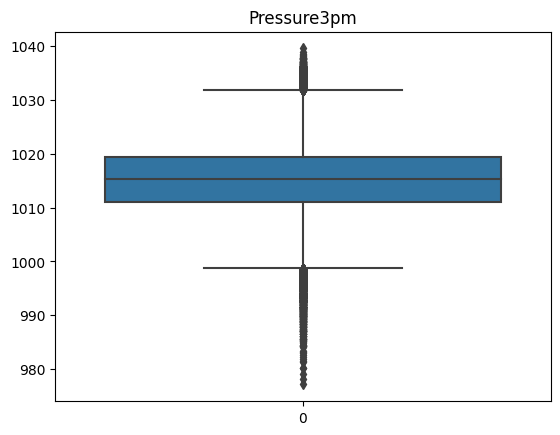

<Figure size 1500x1500 with 0 Axes>

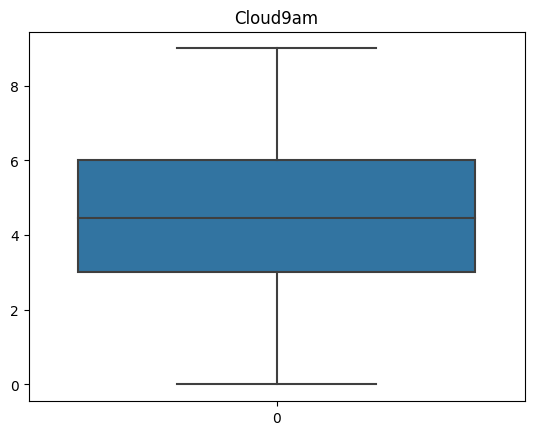

<Figure size 1500x1500 with 0 Axes>

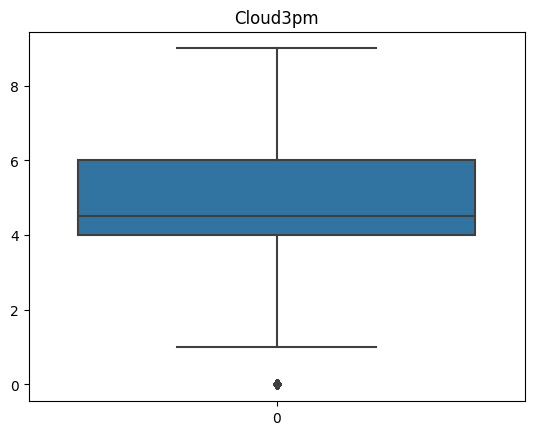

<Figure size 1500x1500 with 0 Axes>

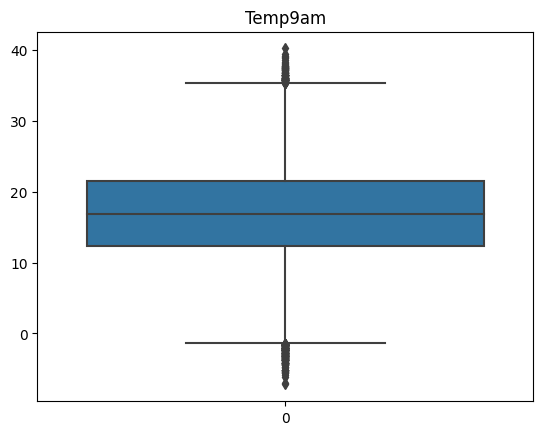

<Figure size 1500x1500 with 0 Axes>

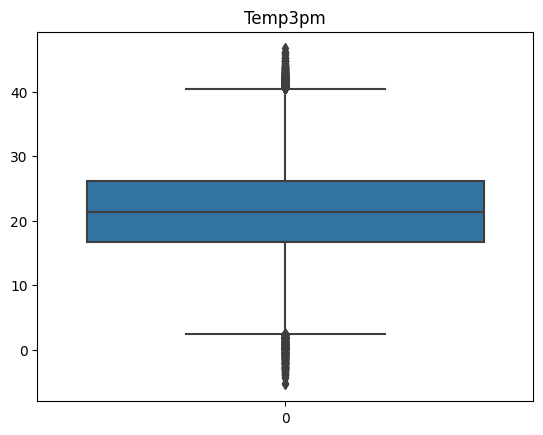

<Figure size 1500x1500 with 0 Axes>

In [16]:
for feature in numerical_cols:
    sns.boxplot(data_preprocessed[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

**In which location the intensity of rainfall is very high?**

In [17]:
data_preprocessed.groupby(by= ['Location', 'RainToday', 'RainTomorrow'])['RainToday'].count()

Location    RainToday  RainTomorrow
Adelaide    No         No              2134
                       Yes              370
            Yes        No               371
                       Yes              318
Albany      No         No              1668
                                       ... 
Wollongong  Yes        Yes              331
Woomera     No         No              2650
                       Yes              157
            Yes        No               157
                       Yes               45
Name: RainToday, Length: 196, dtype: int64

In [18]:
data_preprocessed.groupby(by= ['Location', 'RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = False).head(10)

Location      RainToday  RainTomorrow
AliceSprings  No         No              2655
Woomera       No         No              2650
Mildura       No         No              2449
Canberra      No         No              2402
Cobar         No         No              2377
Moree         No         No              2345
Townsville    No         No              2260
Perth         No         No              2226
SalmonGums    No         No              2222
PearceRAAF    No         No              2211
Name: RainToday, dtype: int64

In [19]:
data_preprocessed.groupby(by= ['Location', 'RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = True).head(10)

Location      RainToday  RainTomorrow
Uluru         Yes        Yes              39
Woomera       Yes        Yes              45
Uluru         No         Yes              77
              Yes        No               77
Nhil          Yes        Yes              81
Mildura       Yes        Yes              94
AliceSprings  Yes        Yes             103
Moree         Yes        Yes             124
Katherine     Yes        No              132
              No         Yes             132
Name: RainToday, dtype: int64

- For the top ten recorded locations based on rainfall count, there was no rainfall reported.
- For the bottom ten recorded locations based on rainfall count, Uluru repeats 3/4 times for all the possible combinations for RainToday and RainTomorrow. Here, the climate keeps on changing very frequently.

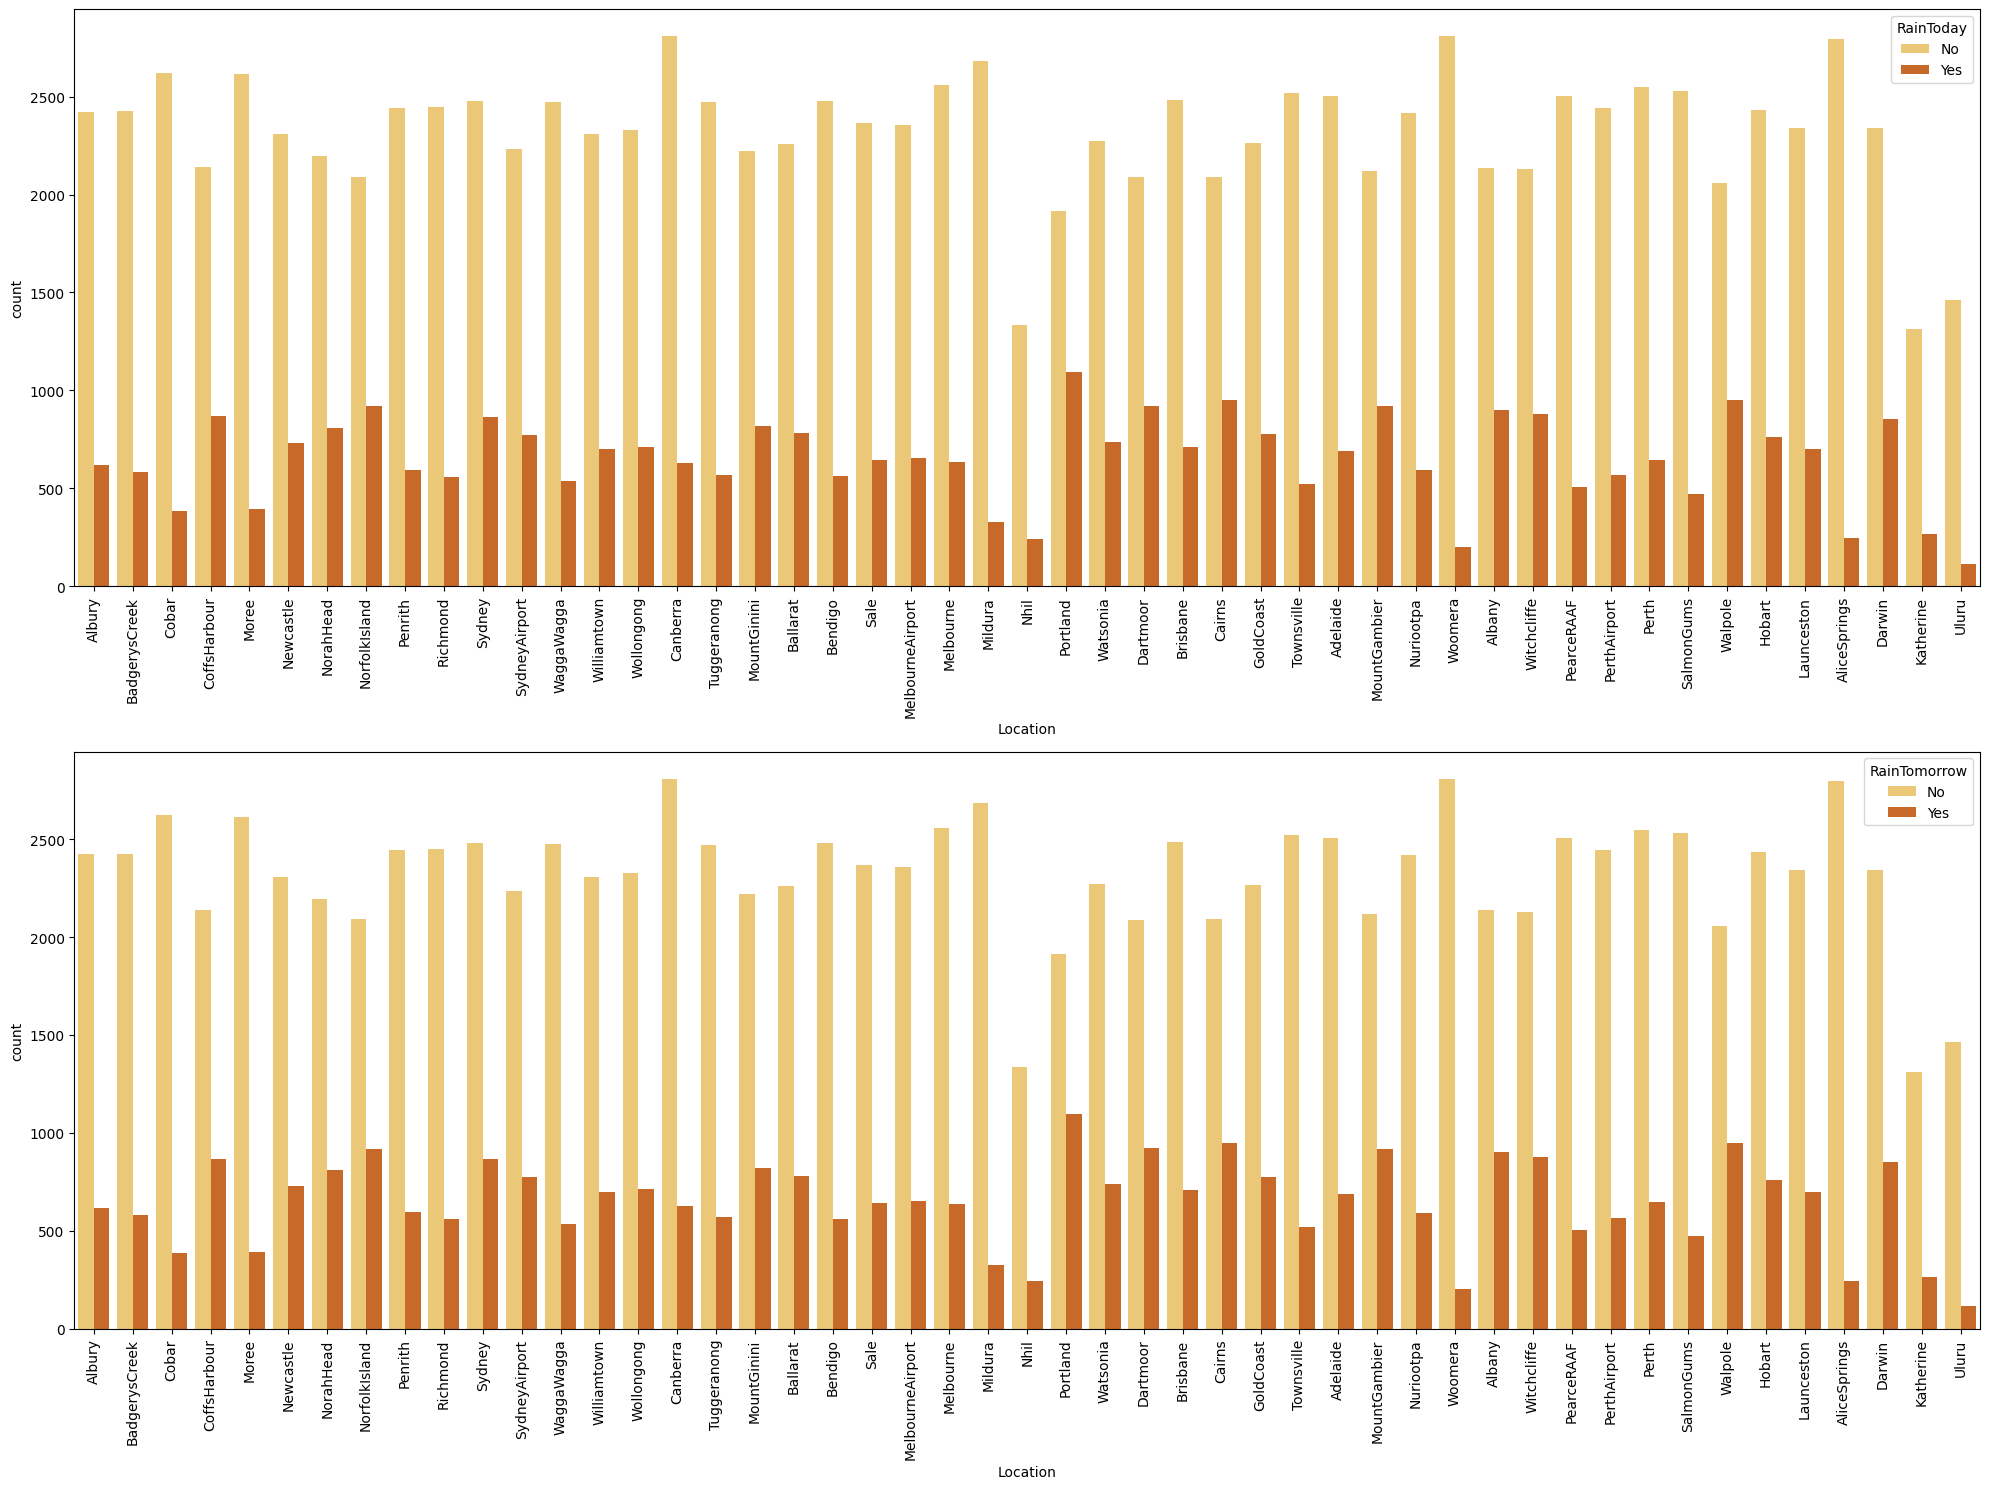

In [20]:
plot_df = data_preprocessed[['Location', 'RainToday', 'RainTomorrow']]
plt.figure(figsize = [20, 15])
plt.subplot(2,1,1)
sns.countplot(data = plot_df, x='Location', hue='RainToday', orient='v', palette="YlOrBr")
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.countplot(data = plot_df, x='Location', hue='RainTomorrow', orient='v', palette="YlOrBr")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
def groupby_fun(col_name, true_or_false):
  return data_preprocessed.groupby(by= [col_name, 'RainToday', 'RainTomorrow'])['RainToday'].count().sort_values(ascending = true_or_false).head(10)

In [22]:
def intensity_of_rain_plt(col_name):
  plot_df = data_preprocessed[[col_name, 'RainToday', 'RainTomorrow']]
  plt.figure(figsize = [15, 10])
  plt.subplot(2,1,1)
  ax = sns.countplot(data = plot_df, x=col_name, hue='RainToday', orient='v', palette="YlOrBr")
  for i in ax.containers:
      ax.bar_label(i,)
  plt.subplot(2,1,2)
  ax = sns.countplot(data = plot_df, x=col_name, hue='RainTomorrow', orient='v', palette="YlOrBr")
  for i in ax.containers:
      ax.bar_label(i,)
  plt.tight_layout()
  plt.show()


**In which month the intensity of rainfall is very high?**

In [23]:
data_preprocessed[['Month', 'RainToday', 'RainTomorrow']]

,Month,RainToday,RainTomorrow
0,12,No,No
1,12,No,No
2,12,No,No
3,12,No,No
4,12,No,No
...,...,...,...
145455,6,No,No
145456,6,No,No
145457,6,No,No
145458,6,No,No


In [24]:
groupby_fun('Month', False)

Month  RainToday  RainTomorrow
1      No         No              9438
3      No         No              8998
5      No         No              8876
10     No         No              8262
6      No         No              7834
11     No         No              7825
4      No         No              7798
8      No         No              7593
9      No         No              7493
12     No         No              7492
Name: RainToday, dtype: int64

In [25]:
groupby_fun('Month', True)

Month  RainToday  RainTomorrow
10     Yes        Yes              865
12     Yes        Yes              953
11     Yes        Yes             1007
2      Yes        Yes             1047
9      Yes        Yes             1059
2      Yes        No              1129
1      Yes        Yes             1147
2      No         Yes             1160
4      Yes        Yes             1162
3      Yes        Yes             1249
Name: RainToday, dtype: int64

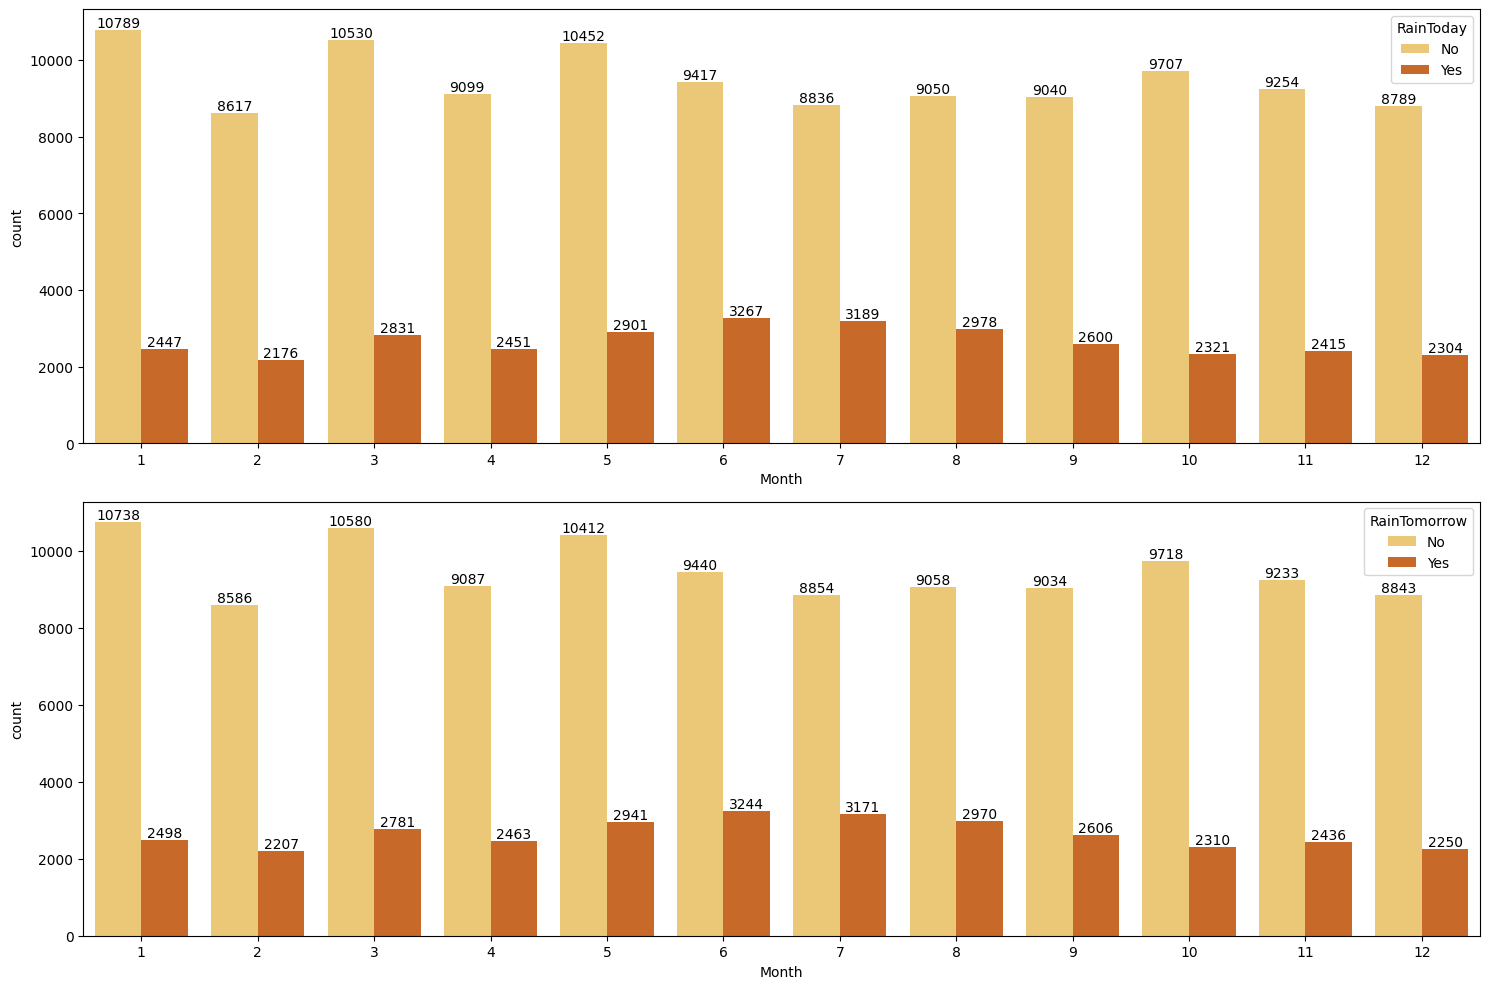

In [26]:
intensity_of_rain_plt('Month')

**In which day the intensity of rainfall is very high?**

In [27]:
data_preprocessed[['Day', 'RainToday', 'RainTomorrow']]

,Day,RainToday,RainTomorrow
0,1,No,No
1,2,No,No
2,3,No,No
3,4,No,No
4,5,No,No
...,...,...,...
145455,21,No,No
145456,22,No,No
145457,23,No,No
145458,24,No,No


In [28]:
groupby_fun('Day', False)

Day  RainToday  RainTomorrow
15   No         No              3280
8    No         No              3259
18   No         No              3234
7    No         No              3231
27   No         No              3225
19   No         No              3215
5    No         No              3209
16   No         No              3200
2    No         No              3200
14   No         No              3195
Name: RainToday, dtype: int64

In [29]:
groupby_fun('Day', True)

Day  RainToday  RainTomorrow
31   Yes        Yes             285
     No         Yes             316
     Yes        No              364
15   Yes        Yes             437
6    Yes        Yes             447
19   Yes        Yes             449
16   Yes        Yes             449
7    Yes        Yes             450
28   Yes        Yes             450
2    Yes        Yes             457
Name: RainToday, dtype: int64

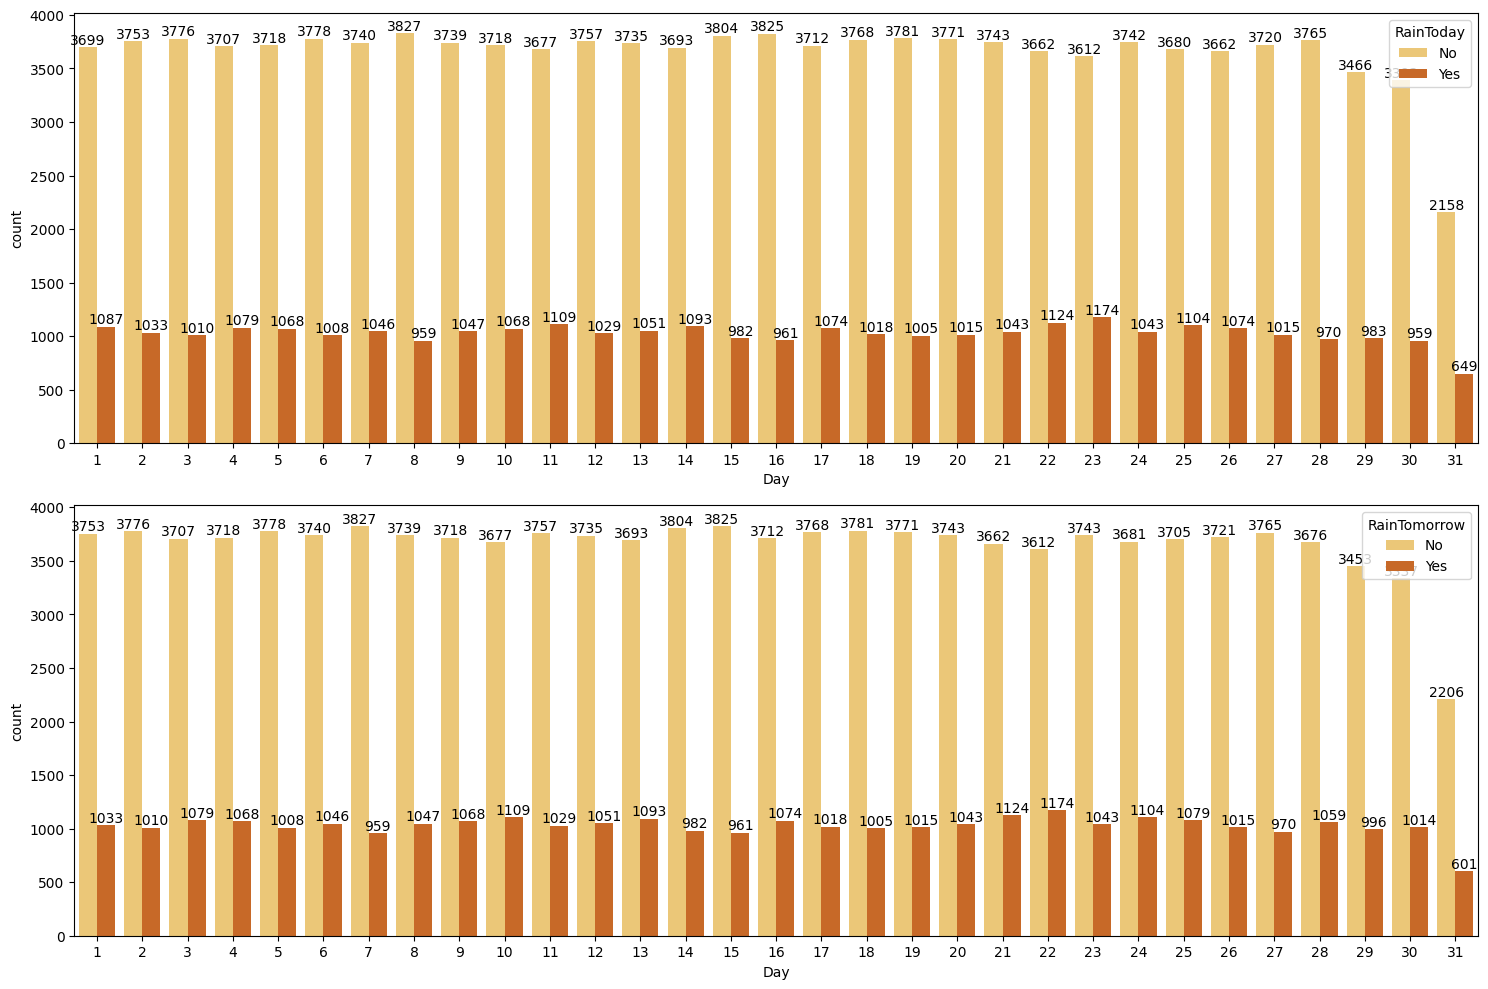

In [30]:
intensity_of_rain_plt('Day')

**In which year the intensity of rainfall is very high?**

In [31]:
data_preprocessed[['Year', 'RainToday', 'RainTomorrow']]

,Year,RainToday,RainTomorrow
0,2008,No,No
1,2008,No,No
2,2008,No,No
3,2008,No,No
4,2008,No,No
...,...,...,...
145455,2017,No,No
145456,2017,No,No
145457,2017,No,No
145458,2017,No,No


In [32]:
groupby_fun('Year', False)

Year  RainToday  RainTomorrow
2014  No         No              12264
2015  No         No              12247
2016  No         No              11398
2009  No         No              11332
2013  No         No              11091
2010  No         No              10660
2012  No         No              10232
2011  No         No               9690
2017  No         No               5906
2016  No         Yes              2356
Name: RainToday, dtype: int64

In [33]:
groupby_fun('Year', True)

Year  RainToday  RainTomorrow
2007  Yes        Yes               8
      No         Yes              11
      Yes        No               11
      No         No               31
2008  Yes        Yes             205
      No         Yes             306
      Yes        No              310
2017  Yes        Yes             809
      No         Yes             954
      Yes        No              954
Name: RainToday, dtype: int64

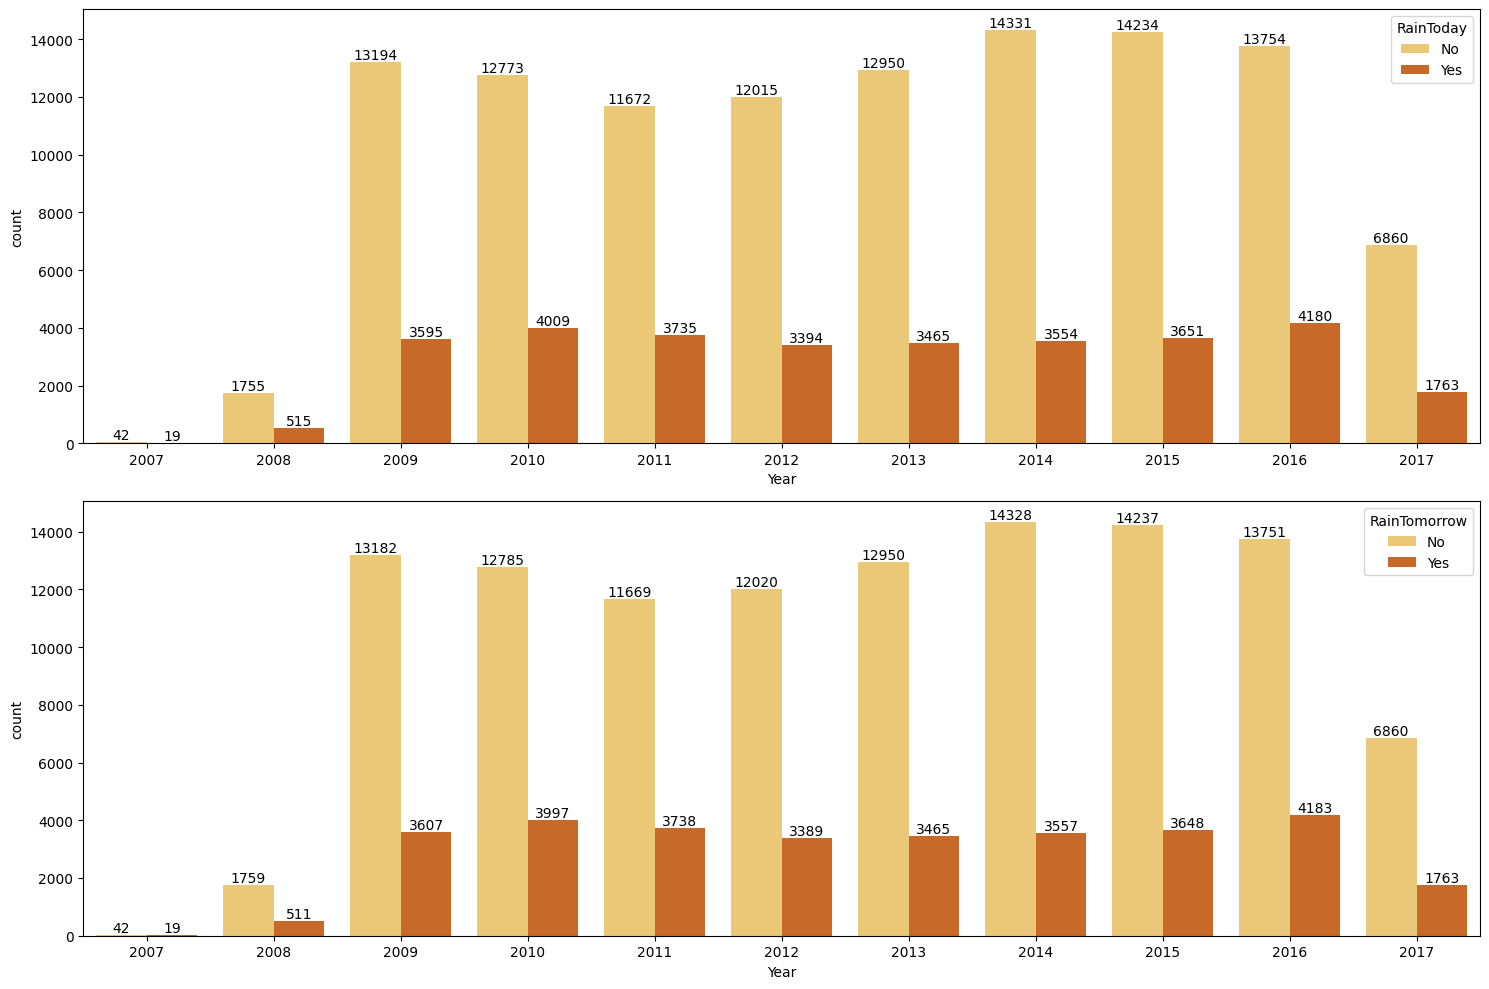

In [34]:
intensity_of_rain_plt('Year')

**In which day of week the intensity of rainfall is very high?**

In [35]:
data_preprocessed[['day_name', 'RainToday', 'RainTomorrow']]

,day_name,RainToday,RainTomorrow
0,Monday,No,No
1,Tuesday,No,No
2,Wednesday,No,No
3,Thursday,No,No
4,Friday,No,No
...,...,...,...
145455,Wednesday,No,No
145456,Thursday,No,No
145457,Friday,No,No
145458,Saturday,No,No


In [36]:
groupby_fun('day_name', False)

day_name   RainToday  RainTomorrow
Saturday   No         No              14048
Friday     No         No              13841
Tuesday    No         No              13748
Sunday     No         No              13742
Wednesday  No         No              13713
Thursday   No         No              13689
Monday     No         No              13519
Sunday     No         Yes              2686
Monday     Yes        No               2589
Thursday   Yes        No               2555
Name: RainToday, dtype: int64

In [37]:
groupby_fun('day_name', True)

day_name   RainToday  RainTomorrow
Sunday     Yes        Yes             1992
Thursday   Yes        Yes             2085
Monday     Yes        Yes             2088
Wednesday  Yes        Yes             2088
Friday     Yes        Yes             2098
Saturday   Yes        Yes             2119
Tuesday    Yes        Yes             2127
Saturday   No         Yes             2217
           Yes        No              2350
Sunday     Yes        No              2359
Name: RainToday, dtype: int64

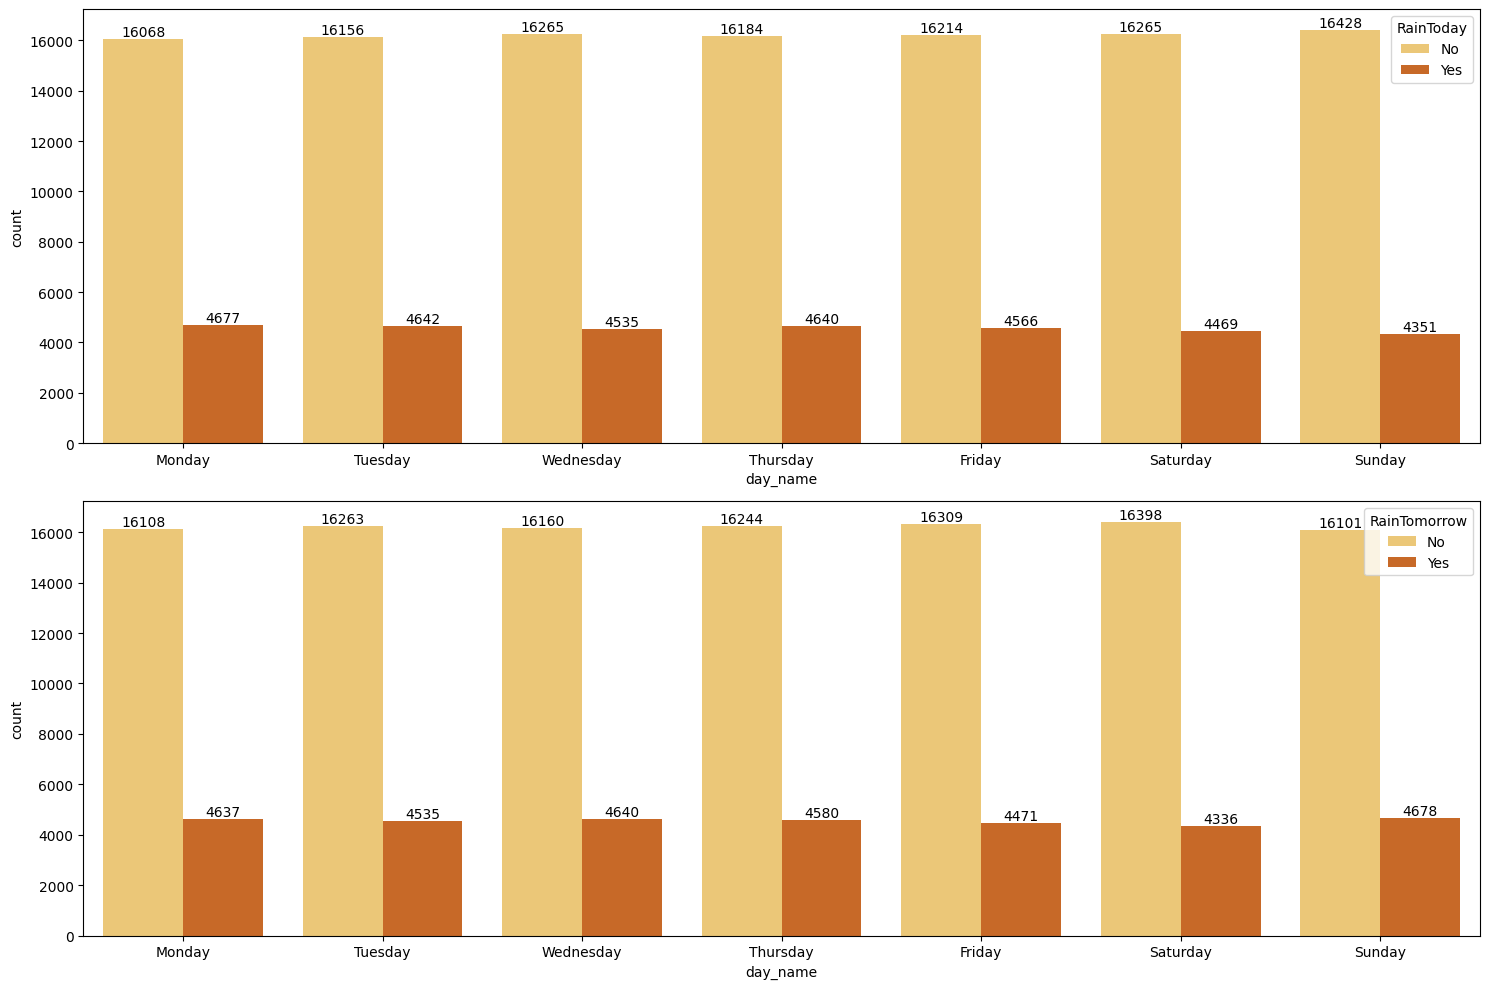

In [38]:
intensity_of_rain_plt('day_name')

**What is the relatiion with the average temp, rainfall tomorrow and today's rainfall?**

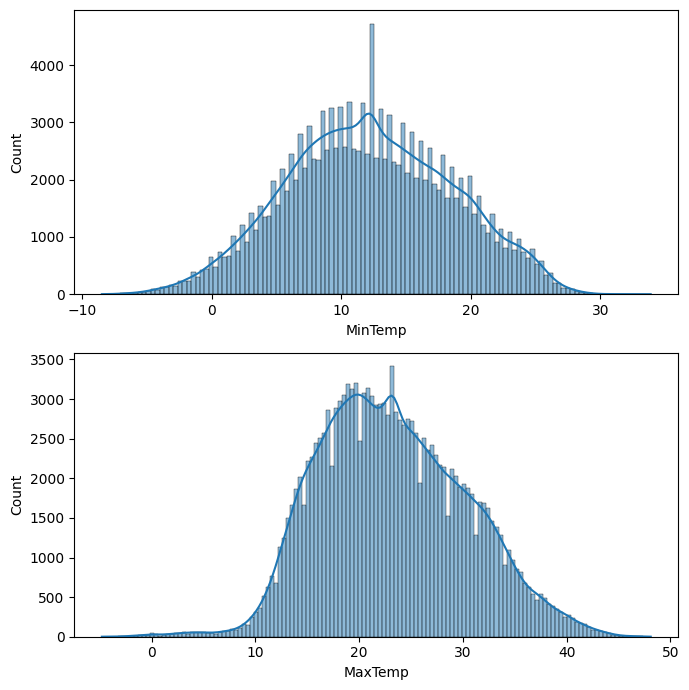

In [39]:
plt.figure(figsize = [7,7])
plt.subplot(2,1,1)
sns.histplot(data = data_preprocessed, x='MinTemp', kde=True)
plt.subplot(2,1,2)
sns.histplot(data = data_preprocessed, x='MaxTemp', kde=True)
plt.tight_layout()
plt.show()

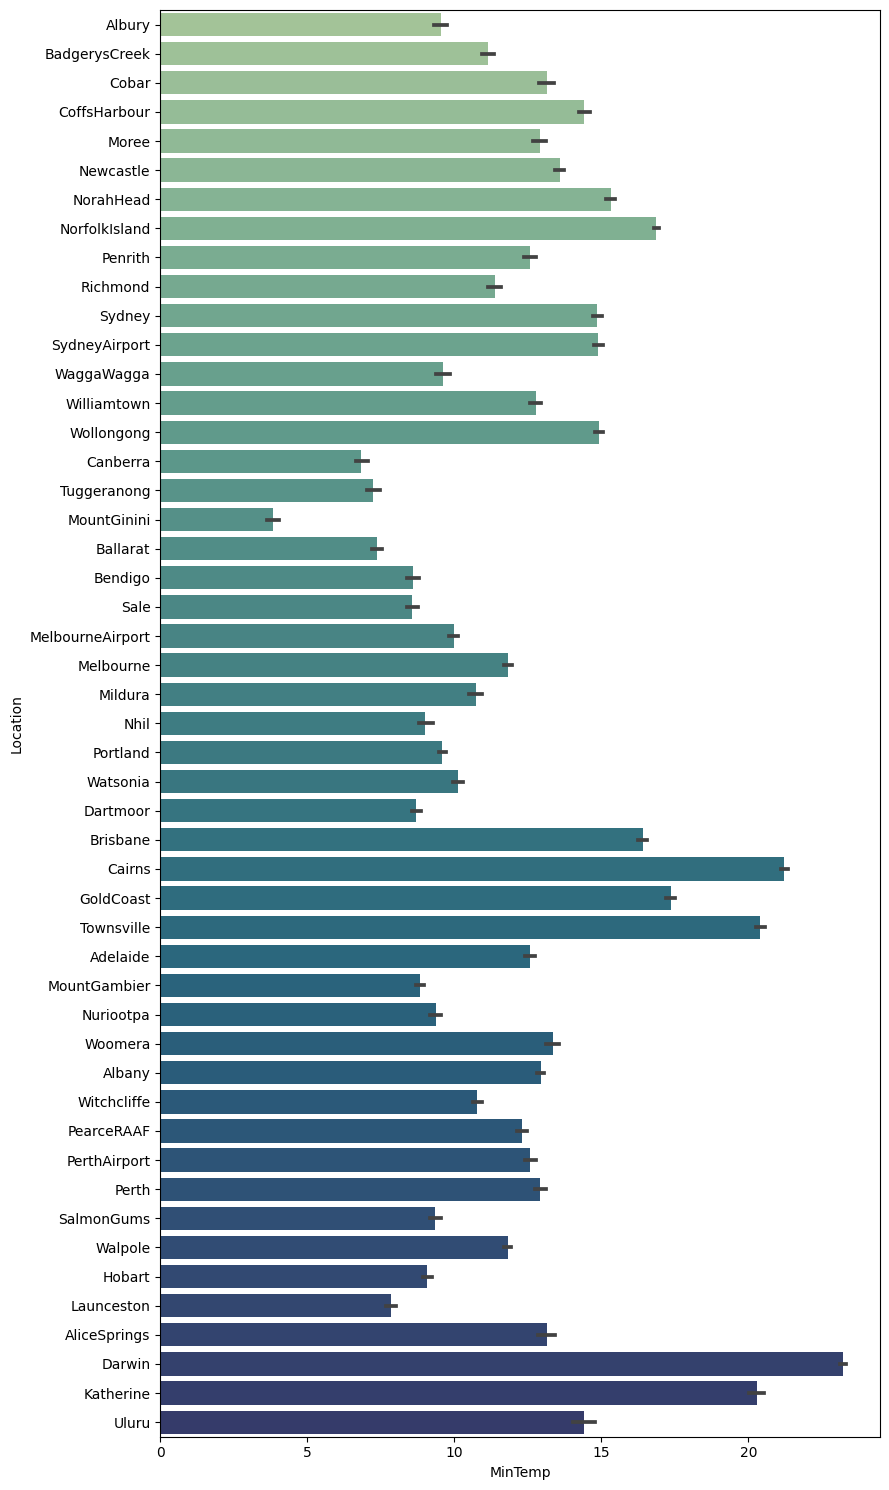

In [40]:
plt.figure(figsize = [9,15])
sns.barplot(data = data_preprocessed, x= 'MinTemp', y='Location', palette= "crest")
plt.tight_layout()
plt.show()

In [41]:
difference = abs(data_preprocessed['MaxTemp'] - data_preprocessed['MinTemp'])

In [42]:
data_preprocessed["difference_temp"] = difference

<BarContainer object of 7 artists>

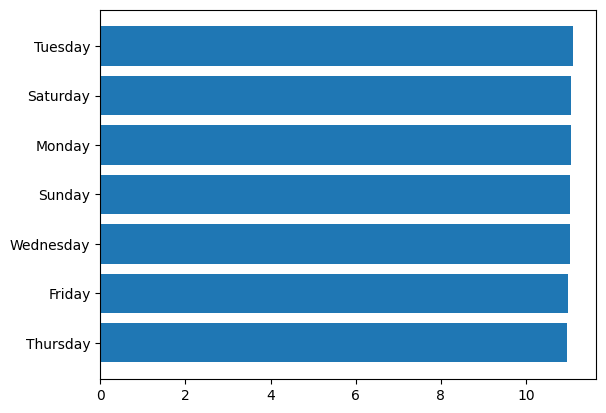

In [43]:
myindex = data_preprocessed.groupby(by = 'day_name')["difference_temp"].mean().sort_values(ascending = True).index
myvalues =data_preprocessed.groupby(by = 'day_name')["difference_temp"].mean().sort_values(ascending = True).values
plt.barh(myindex,myvalues)

**What is the relatiion with the average humidity, rainfall tomorrow and today's rainfall?**

In [44]:
data_preprocessed["average_humidity"] = (data_preprocessed["Humidity9am"] + data_preprocessed["Humidity3pm"])/2

In [45]:
data_preprocessed.groupby(by = ["day_name"])["average_humidity"].mean().sort_values(ascending = True)

day_name
Tuesday      59.851328
Wednesday    60.009054
Thursday     60.236093
Sunday       60.301262
Saturday     60.333392
Monday       60.350337
Friday       60.389311
Name: average_humidity, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


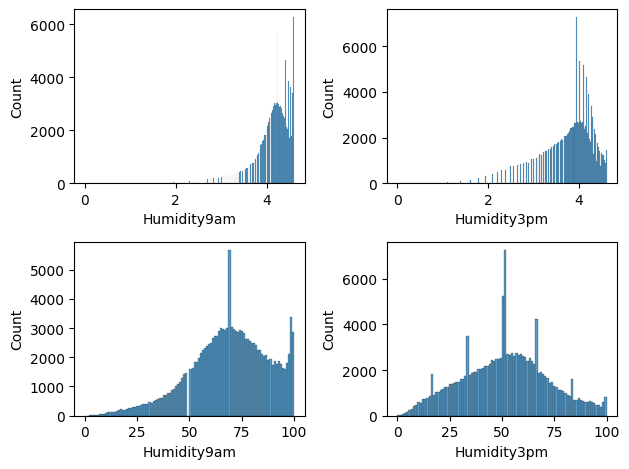

In [46]:
plt.subplot(2,2,1)
sns.histplot(np.log(data_preprocessed["Humidity9am"]))
plt.subplot(2,2,2)
sns.histplot(np.log(data_preprocessed["Humidity3pm"]))
plt.subplot(2,2,3)
sns.histplot(data_preprocessed["Humidity9am"])
plt.subplot(2,2,4)
sns.histplot(data_preprocessed["Humidity3pm"])
plt.tight_layout()
plt.show()

**What is the relatiion with the average windspeed, rainfall tomorrow and today's rainfall?**

In [47]:
data_preprocessed["average_windspeed"] = (data_preprocessed["WindSpeed9am"] + data_preprocessed["WindSpeed3pm"])/2

In [48]:
data_preprocessed.groupby(by = ["day_name"])["average_windspeed"].mean().sort_values(ascending = True)

day_name
Saturday     16.208145
Sunday       16.277926
Friday       16.300774
Monday       16.337591
Thursday     16.417920
Wednesday    16.443146
Tuesday      16.485098
Name: average_windspeed, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


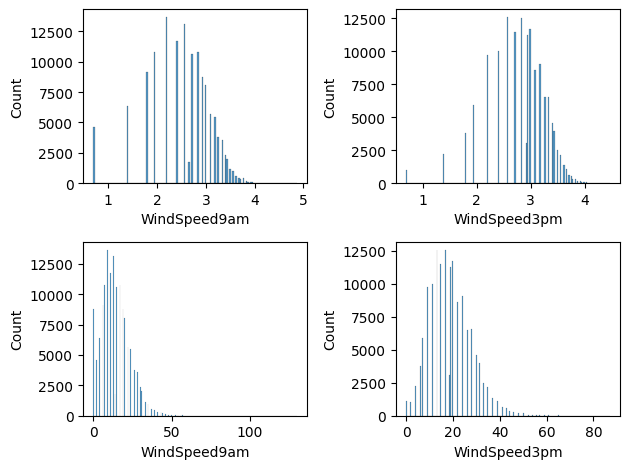

In [49]:
plt.subplot(2,2,1)
sns.histplot(np.log(data_preprocessed["WindSpeed9am"]))
plt.subplot(2,2,2)
sns.histplot(np.log(data_preprocessed["WindSpeed3pm"]))
plt.subplot(2,2,3)
sns.histplot(data_preprocessed["WindSpeed9am"])
plt.subplot(2,2,4)
sns.histplot(data_preprocessed["WindSpeed3pm"])
plt.tight_layout()
plt.show()

In [50]:
ws_9am_min, ws_9am_max = data_preprocessed['WindSpeed9am'].min(), data_preprocessed['WindSpeed9am'].max()

In [51]:
ws_9am_list=[]
for ws in data['WindSpeed9am']:
  if ws > data['WindSpeed9am'].mean():
    ws_9am_list.append("greater_than_average")
  else:
    ws_9am_list.append("less_than_average")

In [52]:
data_preprocessed['WindSpeed9am_cat'] = ws_9am_list

([<matplotlib.patches.Wedge at 0x7f6dcb0a0d30>,
 [Text(-0.1278578184991116, 1.0925439937360182, 'less_than_average'),
  Text(0.12785781849911146, -1.0925439937360182, 'greater_than_average')])

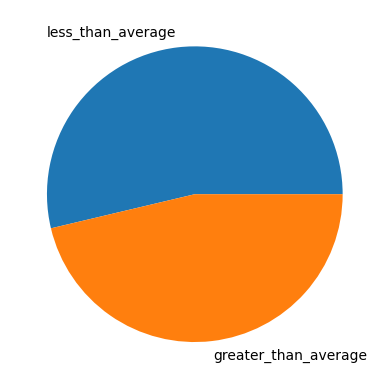

In [53]:
labels = data_preprocessed['WindSpeed9am_cat'].value_counts().index
values = data_preprocessed['WindSpeed9am_cat'].value_counts().values
plt.pie(values, labels=labels)

**What is the relatiion with the average pressure, rainfall tomorrow and today's rainfall?**

In [54]:
data_preprocessed["average_pressure"] = (data_preprocessed["Pressure9am"] + data_preprocessed["Pressure3pm"])/2

In [55]:
data_preprocessed.groupby(by = ["day_name"])["average_pressure"].mean().sort_values(ascending = True)

day_name
Friday       1016.409973
Thursday     1016.413269
Saturday     1016.444557
Tuesday      1016.444603
Wednesday    1016.460108
Sunday       1016.478511
Monday       1016.519558
Name: average_pressure, dtype: float64

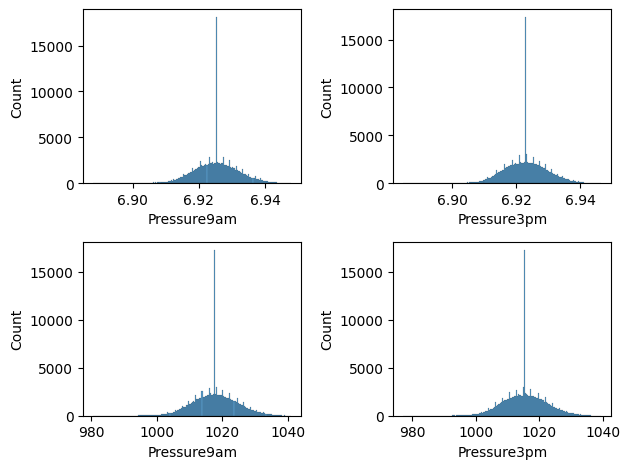

In [56]:
plt.subplot(2,2,1)
sns.histplot(np.log(data_preprocessed["Pressure9am"]))
plt.subplot(2,2,2)
sns.histplot(np.log(data_preprocessed["Pressure3pm"]))
plt.subplot(2,2,3)
sns.histplot(data_preprocessed["Pressure9am"])
plt.subplot(2,2,4)
sns.histplot(data_preprocessed["Pressure3pm"])
plt.tight_layout()
plt.show()

<ipython-input-57-14646365fa22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_preprocessed.corr(), annot= True)


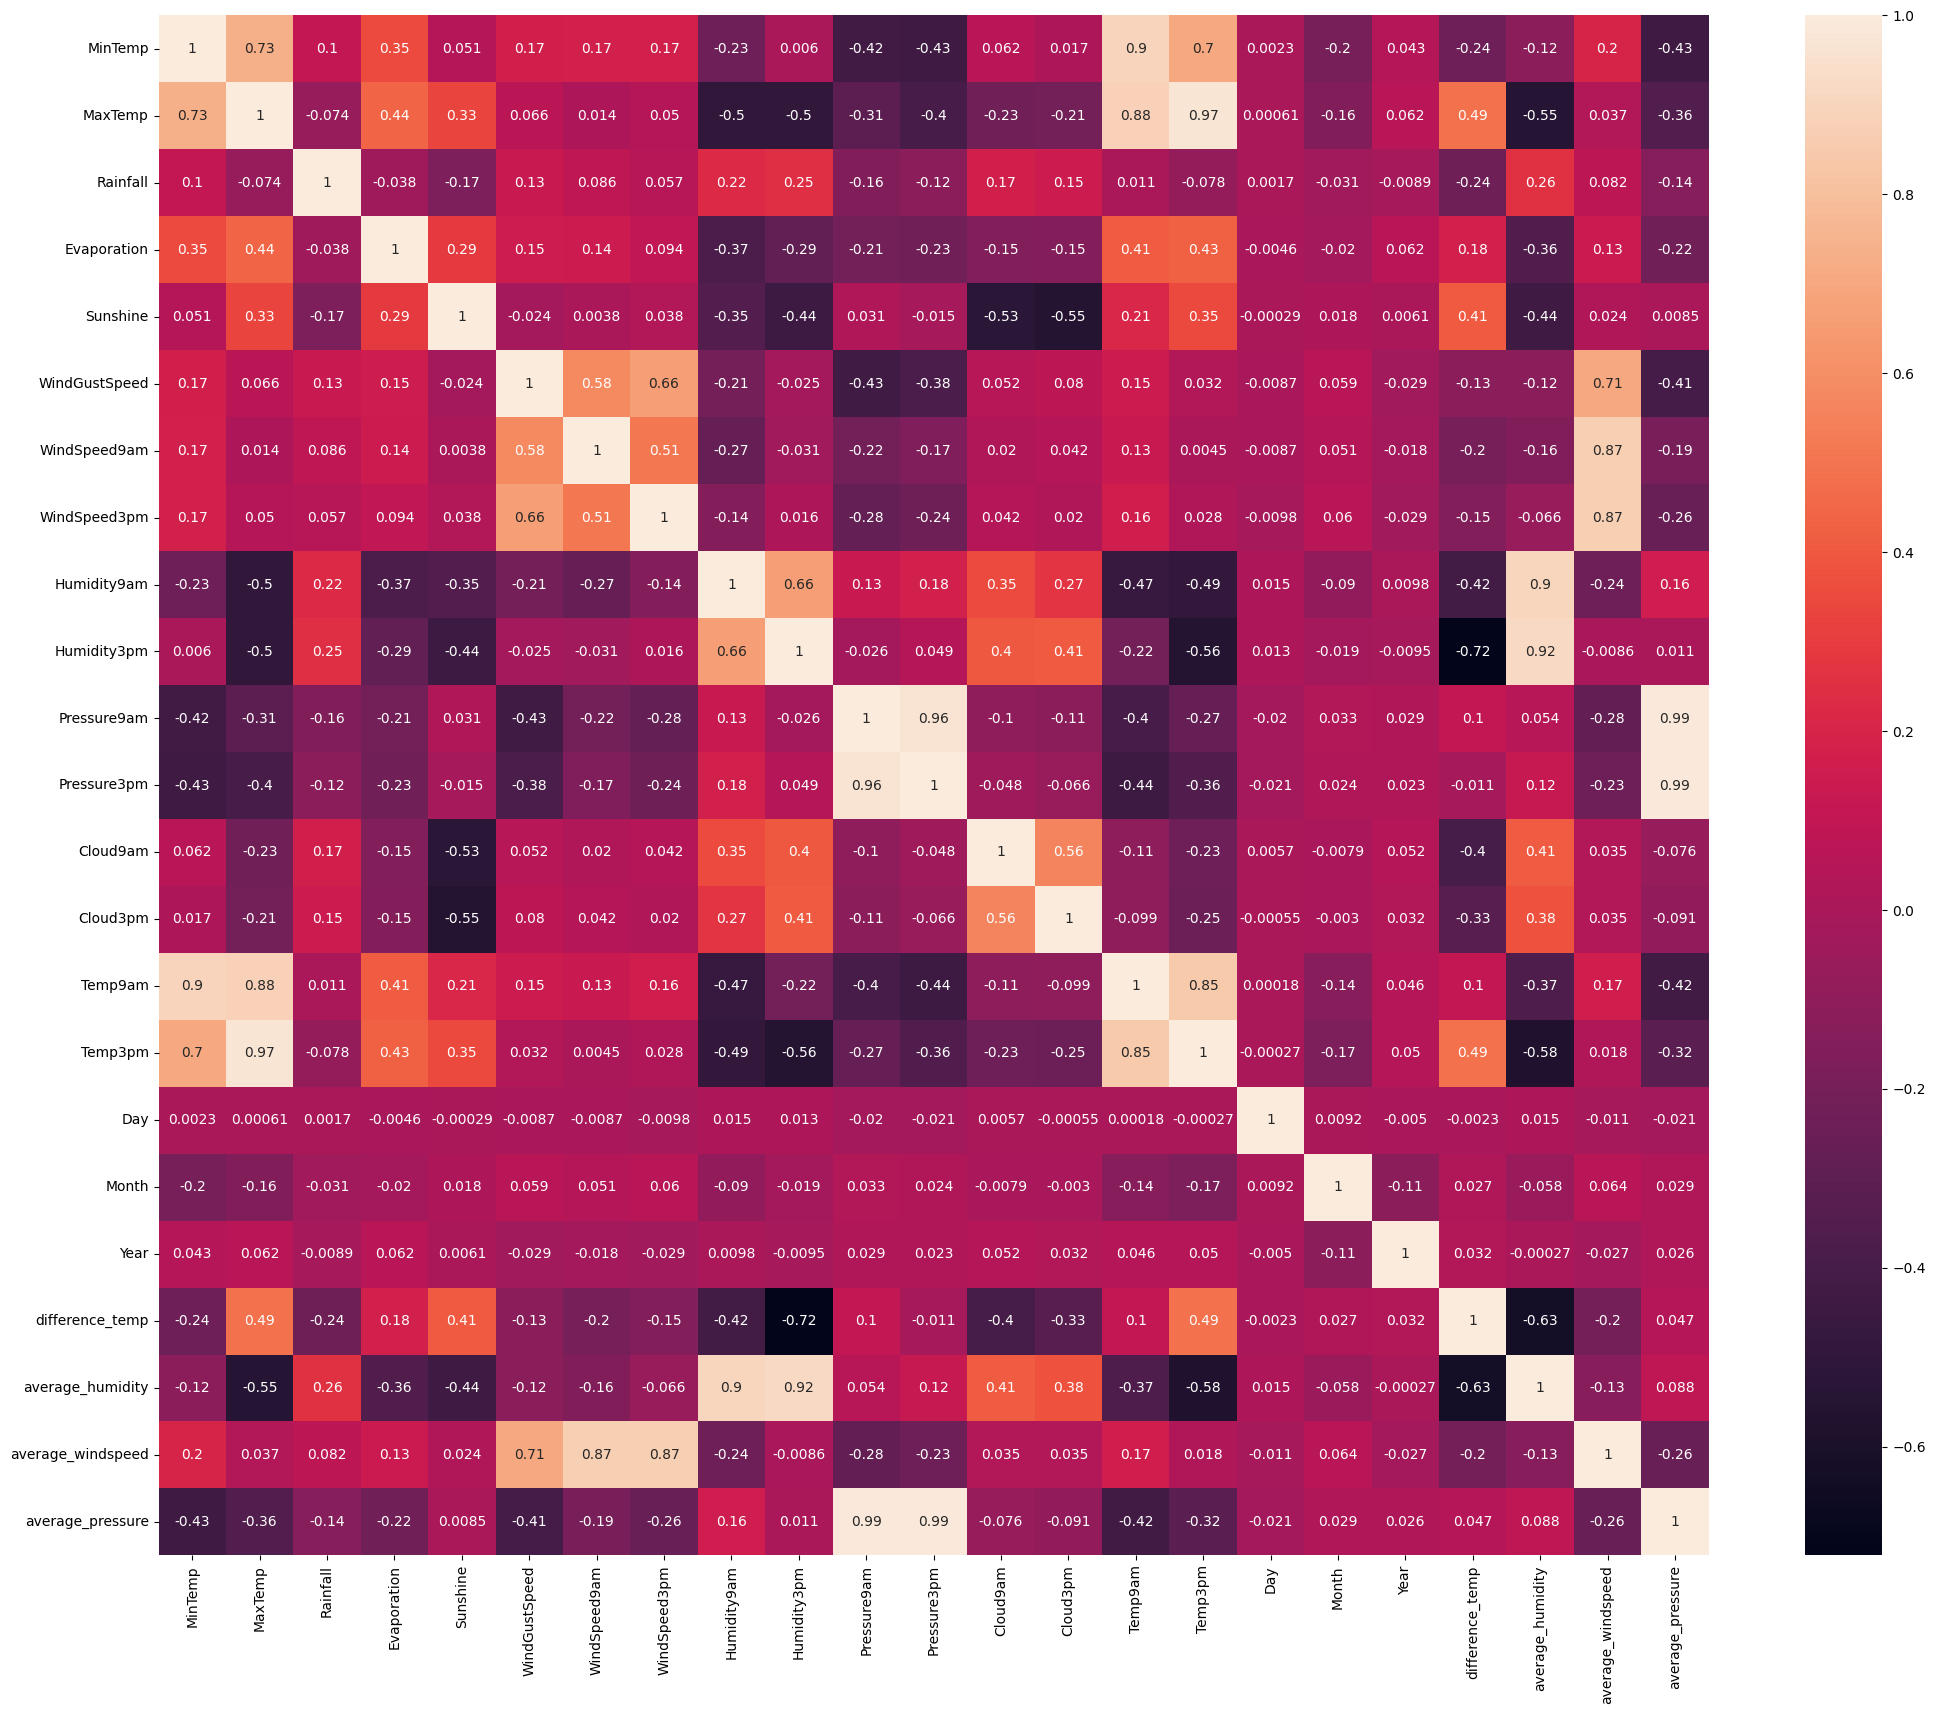

In [57]:
fig = plt.figure(figsize = [25,20])
sns.heatmap(data_preprocessed.corr(), annot= True)
plt.show();

## **Label Encoding**

In [58]:
data_preprocessed.dtypes

Date                  object
Location              object
MinTemp              float64
MaxTemp              float64
Rainfall             float64
Evaporation          float64
Sunshine             float64
WindGustDir           object
WindGustSpeed        float64
WindDir9am            object
WindDir3pm            object
WindSpeed9am         float64
WindSpeed3pm         float64
Humidity9am          float64
Humidity3pm          float64
Pressure9am          float64
Pressure3pm          float64
Cloud9am             float64
Cloud3pm             float64
Temp9am              float64
Temp3pm              float64
RainToday             object
RainTomorrow          object
Day                    int64
Month                  int64
Year                   int64
day_name              object
difference_temp      float64
average_humidity     float64
average_windspeed    float64
WindSpeed9am_cat      object
average_pressure     float64
dtype: object

In [59]:
data_preprocessed.drop(columns=['Year', 'day_name', 'difference_temp', 'average_humidity', 'average_windspeed',
       'average_pressure', 'WindSpeed9am_cat'], axis=1, inplace=True)

In [60]:
data_preprocessed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_preprocessed[categorical_cols] =data_preprocessed[categorical_cols].astype('str').apply(le.fit_transform)

In [62]:
data_preprocessed.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Day                int64
Month              int64
dtype: object

## **Spliting data into x and y**

In [63]:
X = data_preprocessed.drop(['RainTomorrow'], axis = 1)
Y = data_preprocessed['RainTomorrow']

## **Feature Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

## **Train test split**

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

## **Model Training**

The smote.fit_resample() method is used to fit and resample a dataset using the SMOTE algorithm. It takes two arguments:

- X: The dataset to be resampled.
- y: The labels for the dataset.

The fit_resample() method first fits the SMOTE algorithm to the dataset. Then, it generates new synthetic data points for the minority class by interpolating between existing minority data points. Finally, it returns a new dataset that contains the original data points and the newly generated synthetic data points.

The fit_resample() method is a convenient way to use the SMOTE algorithm to handle imbalanced datasets. It can be used to improve the performance of machine learning models on the minority class.

In [66]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


 If one class has a much larger number of data points than the other classes, then the data is likely imbalanced. Here, we can see class 0 has 90866 data points and class 1 has 25502 data points before applying fit. Hence, the data was imbalanced before.

In [67]:
!pip install catboost

In [68]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=200, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.415592
0:	total: 110ms	remaining: 21.9s
1:	total: 166ms	remaining: 16.4s
2:	total: 242ms	remaining: 15.9s
3:	total: 290ms	remaining: 14.2s
4:	total: 348ms	remaining: 13.6s
5:	total: 401ms	remaining: 13s
6:	total: 463ms	remaining: 12.8s
7:	total: 519ms	remaining: 12.5s
8:	total: 570ms	remaining: 12.1s
9:	total: 620ms	remaining: 11.8s
10:	total: 684ms	remaining: 11.7s
11:	total: 744ms	remaining: 11.7s
12:	total: 898ms	remaining: 12.9s
13:	total: 1.06s	remaining: 14.1s
14:	total: 1.16s	remaining: 14.3s
15:	total: 1.24s	remaining: 14.3s
16:	total: 1.29s	remaining: 13.9s
17:	total: 1.35s	remaining: 13.7s
18:	total: 1.43s	remaining: 13.6s
19:	total: 1.48s	remaining: 13.3s
20:	total: 1.54s	remaining: 13.2s
21:	total: 1.6s	remaining: 12.9s
22:	total: 1.66s	remaining: 12.8s
23:	total: 1.71s	remaining: 12.5s
24:	total: 1.77s	remaining: 12.4s
25:	total: 1.82s	remaining: 12.2s
26:	total: 1.88s	remaining: 12s
27:	total: 1.93s	remaining: 11.9s
28:	total: 2.01s	remaining: 11.8s

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21376  1341]
 [ 2701  3674]]
0.8610614601952427
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22717
           1       0.73      0.58      0.65      6375

    accuracy                           0.86     29092
   macro avg       0.81      0.76      0.78     29092
weighted avg       0.85      0.86      0.85     29092



In [70]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 156ms	remaining: 5m 10s
1:	total: 269ms	remaining: 4m 28s
2:	total: 385ms	remaining: 4m 16s
3:	total: 495ms	remaining: 4m 7s
4:	total: 594ms	remaining: 3m 56s
5:	total: 743ms	remaining: 4m 7s
6:	total: 888ms	remaining: 4m 12s
7:	total: 1.07s	remaining: 4m 25s
8:	total: 1.18s	remaining: 4m 20s
9:	total: 1.26s	remaining: 4m 9s
10:	total: 1.41s	remaining: 4m 15s
11:	total: 1.55s	remaining: 4m 17s
12:	total: 1.7s	remaining: 4m 19s
13:	total: 1.82s	remaining: 4m 18s
14:	total: 1.93s	remaining: 4m 16s
15:	total: 2.02s	remaining: 4m 10s
16:	total: 2.07s	remaining: 4m 1s
17:	total: 2.13s	remaining: 3m 54s
18:	total: 2.18s	remaining: 3m 47s
19:	total: 2.23s	remaining: 3m 41s
20:	total: 2.29s	remaining: 3m 35s
21:	total: 2.37s	remaining: 3m 33s
22:	total: 2.47s	remaining: 3m 32s
23:	total: 2.58s	remaining: 3m 32s
24:	total: 2.71s	remaining: 3m 34s
25:	total: 2.83s	remaining: 3m 34s
26:	total: 2.96s	remaining: 3m 35s
27:	total: 3.06s	remaining: 3m 35s
28:	t

In [71]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21459  1258]
 [ 2705  3670]]
0.8637769833631239
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     22717
           1       0.74      0.58      0.65      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [72]:
# function to plot roc curve
def roc_curve_plot(model):
  probs = model.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

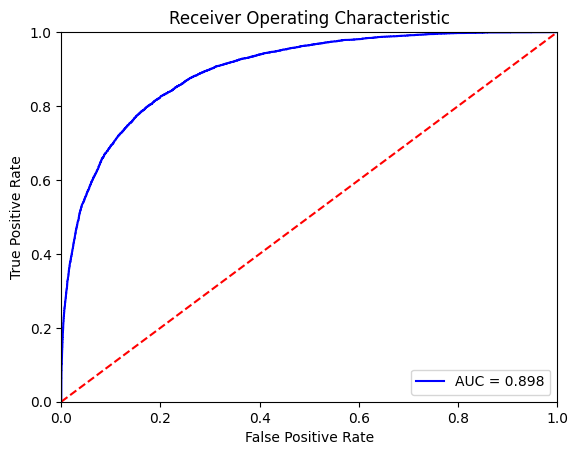

In [73]:
roc_curve_plot(cat)

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [75]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20548  2169]
 [ 2284  4091]]
0.8469338649800633
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     22717
           1       0.65      0.64      0.65      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.77     29092
weighted avg       0.85      0.85      0.85     29092



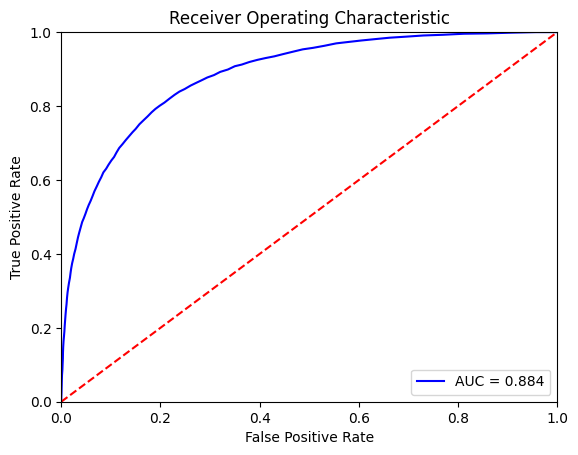

In [76]:
roc_curve_plot(rf)

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17939  4778]
 [ 1658  4717]]
0.7787707960951464
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22717
           1       0.50      0.74      0.59      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.76      0.72     29092
weighted avg       0.82      0.78      0.79     29092



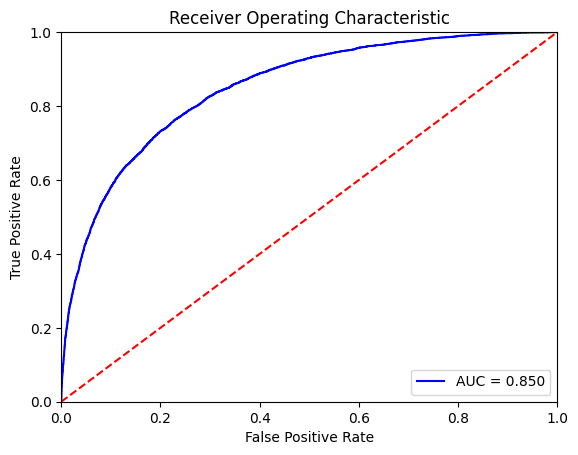

In [79]:
roc_curve_plot(logreg)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [81]:
y_pred3 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[17874  4843]
 [ 1806  4569]]
0.7714491956551629
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     22717
           1       0.49      0.72      0.58      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.75      0.71     29092
weighted avg       0.82      0.77      0.79     29092



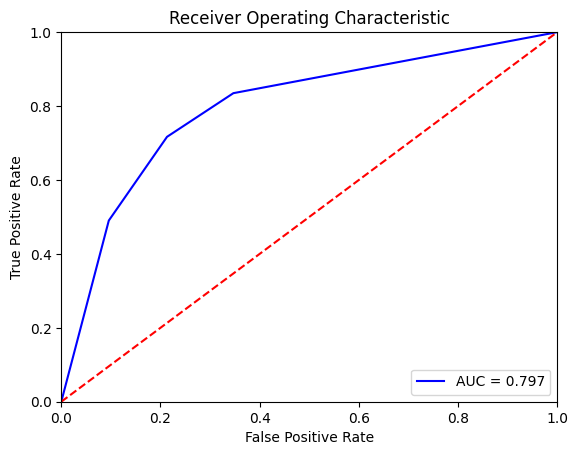

In [82]:
roc_curve_plot(knn)

In [83]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
y_pred4 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[21272  1445]
 [ 2750  3625]]
0.8558022824144095
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22717
           1       0.71      0.57      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



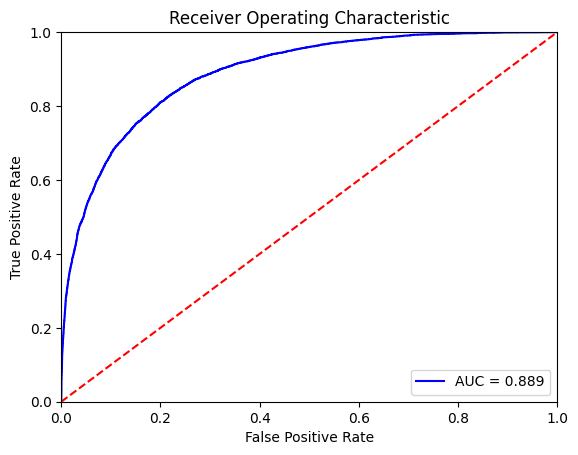

In [85]:
roc_curve_plot(xgb)